In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('insurance.csv')

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.size

9366

In [6]:
df.shape

(1338, 7)

In [7]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
# df['sex']= df['sex'].astype('category')
# df['sex']=df['sex'].cat.codes
# one hot encoading
df= pd.get_dummies(df, columns = ['sex', 'smoker','region'])
print(df)

      age     bmi  children      charges  sex_female  sex_male  smoker_no  \
0      19  27.900         0  16884.92400        True     False      False   
1      18  33.770         1   1725.55230       False      True       True   
2      28  33.000         3   4449.46200       False      True       True   
3      33  22.705         0  21984.47061       False      True       True   
4      32  28.880         0   3866.85520       False      True       True   
...   ...     ...       ...          ...         ...       ...        ...   
1333   50  30.970         3  10600.54830       False      True       True   
1334   18  31.920         0   2205.98080        True     False       True   
1335   18  36.850         0   1629.83350        True     False       True   
1336   21  25.800         0   2007.94500        True     False       True   
1337   61  29.070         0  29141.36030        True     False      False   

      smoker_yes  region_northeast  region_northwest  region_southeast  \
0

In [9]:
# df['smoker']= df['smoker'].astype('category')
# df['smoker']=df['smoker'].cat.codes

In [10]:
# df['region']= df['region'].astype('category')
# df['region']=df['region'].cat.codes

In [11]:
x= df.drop(columns='charges')
x

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,False,True,True,False,False,True,False,False
1334,18,31.920,0,True,False,True,False,True,False,False,False
1335,18,36.850,0,True,False,True,False,False,False,True,False
1336,21,25.800,0,True,False,True,False,False,False,False,True


In [12]:
y= df['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr=LinearRegression()

In [15]:
lr.fit(x_train,y_train)

LinearRegression()

In [16]:
c=lr.intercept_

In [17]:
m=lr.coef_
m

array([   256.43544682,    335.36907276,    472.70978916,     23.77337759,
          -23.77337759, -11717.99558474,  11717.99558474,    589.02469054,
           27.12354518,   -405.723989  ,   -210.42424672])

In [18]:
y_pred_test=lr.predict(x_test)

In [19]:
y_pred_test

array([ 1.12531936e+04,  9.54490709e+03,  3.78498010e+04,  1.60692697e+04,
        6.73440872e+03,  4.00446268e+03,  1.60576551e+03,  1.43015300e+04,
        8.89696521e+03,  7.34111088e+03,  4.67363726e+03,  1.01633582e+04,
        8.89221066e+03,  3.78513354e+03,  2.74730092e+04,  1.08538364e+04,
        1.10975451e+04,  6.15331614e+03,  8.05810804e+03,  2.69726437e+04,
        3.33303371e+04,  1.42507758e+04,  1.18538537e+04,  3.19917201e+04,
        4.08938830e+03,  9.31679198e+03,  1.14341410e+03,  9.91266828e+03,
        3.75184042e+03,  1.02673370e+04,  8.90007511e+03,  3.99578709e+04,
        1.57594956e+04,  1.39309106e+04,  2.46369056e+04,  5.22461192e+03,
        1.26648825e+04,  3.06140223e+04,  3.32333392e+04,  3.66174044e+03,
        4.05511934e+03,  3.92923473e+03,  3.04112144e+04,  3.92034732e+04,
        2.75801212e+04,  4.89321443e+03,  1.07431646e+04,  7.62347812e+03,
        3.69013781e+03,  1.03016223e+04,  5.75534832e+03,  3.26005023e+03,
        3.29256311e+04,  

In [20]:
r2_score(y_test,y_pred_test)

0.7909160991789905

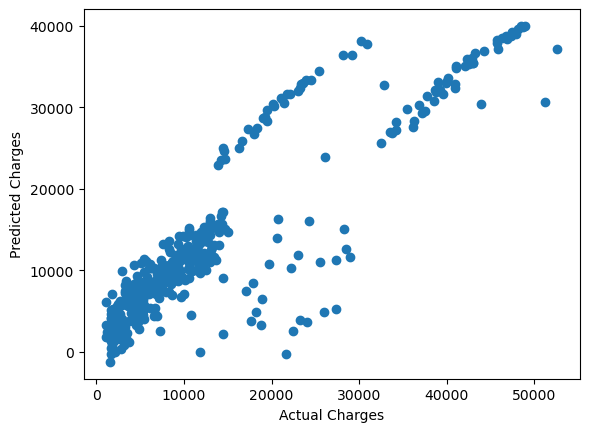

In [22]:
plt.scatter(y_test,y_pred_test)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()